# Lab 1: practice what you learned

Now that you have learned the basics of data frames and pandas, you will use this to load and explore a new data file.  We will work with the adult data which you can obtain from the Kaggle repository: https://www.kaggle.com/wenruliu/adult-income-dataset

The first step is to import the libraries you will need for your work.  Insert your code to load the libraries in the code cell below: 

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Read the data 

Now you need to specify the path for the file, which you have previously downloaded: 

In [9]:
adult_data = pd.read_csv("adult.csv")

print("Adult data loaded")

Adult data loaded


In [11]:
adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Once you inspect the data you will The columns are: "age", "workclass", "fnlwgt", "education",  "educational-num","marital_status", "occupation", "relationship", "race", "gender","capital-gain", "capital-loss", "hours-per-week", "native-country","income".



You may wish to specified now two separate lists, one which contains the __categorical columns__, and one which contains the __numeric columns__ of interest. Note that we can exclude some columns (e.g. "fnlwgt" by not adding them to the array below).  This is not necessary for loading the data but may help when you are applying particular operations to each type of column.  The categorical columns of interest are: "workclass", "education", "marital-status", "occupation","relationship", "race", "gender", "native-country".  The numeric columns are: "age", "education-num", "capital-gain", "capital-loss", "hours-per-week".

In [61]:
adult_cat = ["workclass","education","marital-status","occupation","realtionship","race","gender","native-country"] 
adult_num = ["age","educational-num","capital-gain","capital-loss","hours-per-week"]

print(adult_cat)
print(adult_num)

['workclass', 'education', 'marital-status', 'occupation', 'realtionship', 'race', 'gender', 'native-country']
['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Now you are ready to read the data into the data frame _Adult_data_.  

In [ ]:
#done earlier

Check the data that you read, in particular find out how many records and columns there are in the dataset. Check the first and last few rows to ensure the data is being read correctly.  

In [15]:
adult_data.shape

(48842, 15)

## Accesing the data

We will focus on the training data for some exploration. Practice now accessing a few columns.  For example, start by accessing the column containing __education__.

In [16]:
adult_data["education"]

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object

Now access the all of the rows but only the __relationship, gender__ and __income_bracket__ columns.


In [22]:
adult_data.loc[:,["relationship","gender","income"]]

,relationship,gender,income
0,Own-child,Male,<=50K
1,Husband,Male,<=50K
2,Husband,Male,>50K
3,Husband,Male,>50K
4,Own-child,Female,<=50K
...,...,...,...
48837,Wife,Female,<=50K
48838,Husband,Male,>50K
48839,Unmarried,Female,<=50K
48840,Own-child,Male,<=50K


Now, access the first 5 rows for the 3th column, __education__.

In [23]:
adult_data.loc[0:5,["education"]]

,education
0,11th
1,HS-grad
2,Assoc-acdm
3,Some-college
4,Some-college
5,10th


Let us do some conditional selection.  Select only those with the higher salaries, >50K and with __relationship__ _'Husband'_. How many rows are there? 

In [35]:
adult_data.loc[ (adult_data.income==">50K") & (adult_data.relationship=="Husband") ]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,34,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
48814,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


## Summary statistics 

Let us now attempt to describe all our attributes. Start by describing some attributes, for example the categorical attribute __education__ and then the numeric attribute __education_number__. What kind of information do you get from the `describe()` function for a categorical attribute?  What about for a numeric attribute? 

In [36]:
adult_data.education.describe()

count       48842
unique         16
top       HS-grad
freq        15784
Name: education, dtype: object

In [43]:
adult_data["educational-num"].describe()

count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational-num, dtype: float64

Try to find the mean for the capital-gain atribute using the `mean()` function. 

In [45]:
adult_data["capital-gain"].mean()

1079.0676262233324

What are the unique values in the __education__ attribute? How many occurrences of each are there in the dataset? Which are the most and least frequent?

In [46]:
adult_data["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [49]:
adult_data["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

## Creating a data dictionary

### Numeric variables

Let us know collect all of the statistics for all of the attribute plus some initial visualisations to show us the characteristics of each attribute.  First, try you use the `describe()` function but apply it to all of the numeric columns of interest so that you end up with a data frame that has the as columns the attributes and as rows the different values returned by `describe()`, e.g. count, mean, etc.


In [103]:
adult_data_num = adult_data[adult_num]

num_desc = adult_data_num.describe()
num_desc

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


We can add even more information to it.  Calculate also the median and total number of null values for each attribute and add them to the Data Frame you created for the stats. (Hint: for this you can use `median()` and `isnull().sum`.

In [104]:
median = adult_data_num.median()
missing = adult_data_num.isnull().sum()

new_rows = pd.DataFrame([median, missing], index=['median', 'missing'])

num_desc_total = num_desc.append(new_rows)

num_desc_total

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000
median,37.000000,10.000000,0.000000,0.000000,40.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000


### Visualisations to show distributions for each numeric variable

Now, let us produce a visualisation for each of those attributes that enable us to see the distribution, but also using the target attribute to contrast the distributions for the different labels.  First we need to divide the data into two data frames one for the records with _High_ income (>50K) and one for those with _Low_ income (<=50K). Remember that you can do conditional selects.  

In [107]:
adult_low_income = adult_data[adult_data.income == "<=50K"]
adult_high_income = adult_data[adult_data.income == ">50K"]


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48826,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


Now, let us use a __kde plot__, just as we did in the first part of the lab to show the distribution of an attribute, using colour shading to contrast distributions for each target income. Remember, this can be done by doing one plot after another for the  (>50K) and  (<=50K) data frames. Let us do this for the attribute _educational-num_ and make sure you add a title and a legend to your graph. What does it tell you about the differences in education for each income group?

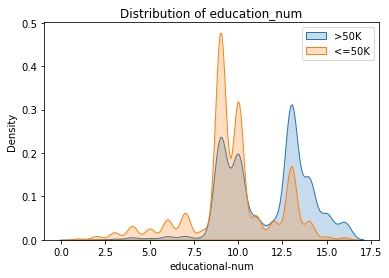

In [110]:
sns.kdeplot(data=adult_high_income['educational-num'],label=">50K", fill=True)
sns.kdeplot(data=adult_low_income['educational-num'], label="<=50K",fill=True)

plt.title("Distribution of education_num by income")
plt.legend()

Now, let us try the same but we will do the graphs for every numeric attribute in succession, just as we generated the descriptive statistics for each attribute.  To make sure that all your graphs do not merge into one you can use the ` plt.figure()` method before you plot the graph for a particular attribute. Your plots should still include a title and legend.  You can save each plot in the working directory as a figure too if you wish.  For this, you can use the  `plt.savefig('Name of graph'+'.jpg')` to produce the .jpg in the working directory.  

You can even plot all of the figures together as subplots. 

This graphs show what we may call one-way analysis when we look at the effect of each variable on the target variable.  What have you learned from the data by looking at those?  

### Categorical variables

Now we do similar statistics and visualisations for the categorical variables.  Again, we use the `describe()` function and apply it to all of the  categorical columns so that we end up with a data frame that has the as columns the attributes and as rows the different values returned by `describe()`, e.g. count, unique, etc.  We can optionally add for the categorical variables also how many missing values, plus the list of unique values in each column or attribute. 



### Visualisations to show distributions for each categorical  variable

Now, we will produce countplots to show distribution of values for categorical variables.  We can add the __income__ attribute through the _hue_ parameter to contrast the distributions for the different labels.   In the previous exercise we did not see so much about visualisation of categorical variables but you can find some help here: https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot.  The first thing we may want is a `sns.countplot` to show the distribution of, say, __gender__.  Countplots only require you to specify the values for the x_axis (if you are happy with a horizontal plot).  Make sure you use the   `hue='income` parameter to ensure distribution for both labels are shown.  You can experiment with plot size through the `plt.figure(figsize=(length,width))` parameter by chaging the values length and width.

The plot can be changed to be a vertical plot by specifying gender to be the y-axis (no x-axis).  Try it. 

Not let's do the plots for every categorical variable, as we did before for every numeric variable.  When you have done so, you may notice some of them have many categories and the labels are squashed in the graph.  You could turn the labels vertically with ` plt.xticks(rotation=90) ` if you have a horizontal bar graph. 

Again, what can we learn from those plots in terms of the relationship between various categorical variables and income levels? 

## Further Visualisations: relationships within 2 or more variables

As the final part of our lab, let us explore further visualisations that explore two or more variables and their relationship to the target variable.  For example, we could try a violin plot (see https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) showing __gender__ in the x-axis and __age__ in the y-axis, with the income represented by the hue.  What does it tell us?

Or alternatively try the same as a box or boxen plot and compare them.  Which is visually more informative? 

Insert a scatterplot if __relationship__ against __education__. Help can be found here (https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) Play with the height and aspect to make it look right.  What do you learn about the data? Are there particular combinations that have a high concentration of high earners? 

Perhaps look at __education__ against __capital-gain__ with a scatterplot.  What do you discover? 

Or try the same variables, __education__ against __capital-gain__ but using a barplot.

# All done!!!

You have experimented with how to start building data dictionaries, how to use various visualisations to discover relationships between the data in the exploratory face of the project and more!

In [50]:
print("yipee!")

yipee!
